In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3552, 18)

In [5]:
df.head()

,property_type,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,Ansals Highland Park,1.20,6186.0,3,3,3+,4.0,Under Construction,1940.0,0,1,0,0,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,4,6,2,11.0,New Property,2521.0,0,1,0,0,1,0,86
2,flat,sohna road,Signature Global Park4.0 ★,0.72,5990.0,2,2,3,3.0,Relatively New,1095.0,0,0,0,1,0,0,158
3,house,sector 112,experion windchants,9.50,23457.0,5,5,3,2.0,Relatively New,7450.0,0,1,0,0,0,0,45
4,flat,sector 70a,BPTP Astaire Gardens3.7 ★,1.60,8658.0,4,4,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,1.20,3,3,3+,4.0,Under Construction,1940.0,0,1,0,0,0,0,0
1,flat,sector 86,1.30,4,6,2,11.0,New Property,2521.0,0,1,0,0,1,0,86
2,flat,sohna road,0.72,2,2,3,3.0,Relatively New,1095.0,0,0,0,1,0,0,158
3,house,sector 112,9.50,5,5,3,2.0,Relatively New,7450.0,0,1,0,0,0,0,45
4,flat,sector 70a,1.60,4,4,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42


<Axes: >

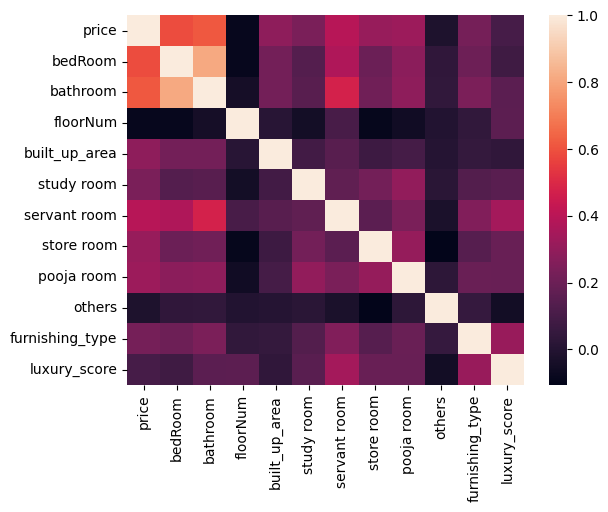

In [8]:
sns.heatmap(train_df.select_dtypes(include=["float64","int64"]).corr())

In [9]:
train_df.select_dtypes(include=["float64","int64"]).corr()['price'].sort_values(ascending=False)

price              1.000000
bathroom           0.612073
bedRoom            0.588864
servant room       0.391629
pooja room         0.324463
store room         0.310970
built_up_area      0.289955
study room         0.239002
furnishing_type    0.225048
luxury_score       0.096941
others            -0.017754
floorNum          -0.087294
Name: price, dtype: float64

In [11]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession